<a href="https://colab.research.google.com/github/AmoguJUduka/MachineLearning/blob/main/DeepLearningAssignments/Homework2/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Implementation of Neural Network from scratch using Numpy**

__Step 1 : Creating the data set using numpy array of 0s and 1s.
As the image is a collection of pixel values in a matrix, we will create those matrices of pixels for A, B, C__

In [1]:
# Creating data set

# A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]


**Transform to numpy arrays**

In [2]:
import numpy as np
a = np.array(a)
b = np.array(b)
c = np.array(c)

__Step 2 : Visualization of data set__

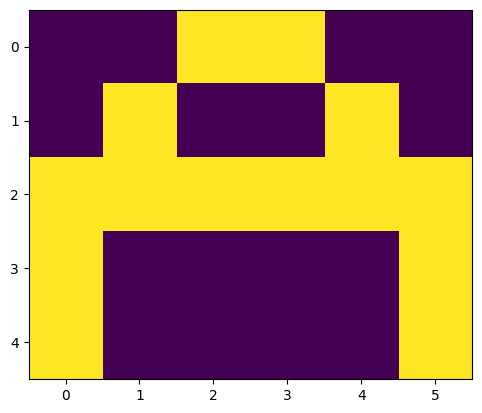

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, plotting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

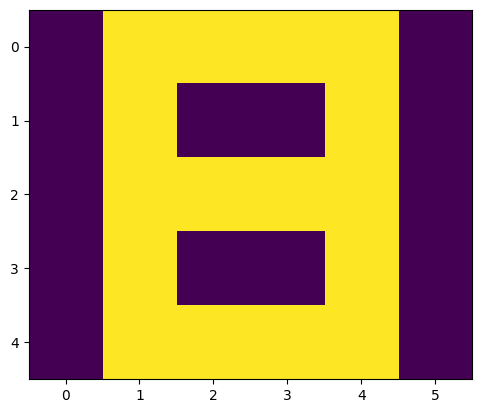

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, plotting B.
plt.imshow(np.array(b).reshape(5, 6))
plt.show()

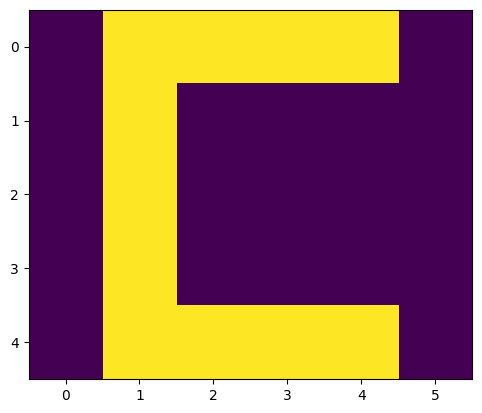

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, plotting C.
plt.imshow(np.array(c).reshape(5, 6))
plt.show()

__Step 3 :As the data set is in the form of list we will convert it into numpy array__

In [6]:
# converting data and labels into numpy array

"""
Convert the matrix of 0 and 1 into one hot vector
so that we can directly feed it to the neural network,
these vectors are then stored in a list X.
"""

X = np.concatenate((np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), np.array(c).reshape(1, 30)), axis = 0).T
Y = np.array(y)

print(X.shape, "\n", Y.shape)

(30, 3) 
 (3, 3)


__Step 4 : Defining the architecture or structure of the deep neural network. This includes deciding the number of layers and the number of nodes in each layer. Our neural network is going to have the following structure__

<div class="alert alert-block alert-success"> 1st layer: Input layer(1, 30) <br>
2nd layer: Hidden layer (1, 5)<br>
3rd layer: Output layer(1, 3)<br>
The output $Y$ of all three samples is of size (3, 3)

__Step 5: Declaring and defining all the function to build deep neural network__

__Step 5.1: Determine the input layer size and the output size__

In [7]:
def layer_sizes(X, Y):
    """
    Argument:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    Return:
    n_x -- the number of nodes in the input layer
    n_y -- the number of nodes in the output layer
     """
    ### extract the layer sizes from input and output shapes ###
    n_x = X.shape[0] # size of input layer
    n_y = Y.shape[0] # size of output layer
    ######
    return (n_x, n_y)

__Step 5.2: Parameter initialization.__ <br>
The shapes of parameters W1, b1, W2 and b2 are determined by the
layer sizes (n_x, n_h, n_y). The elements in W1 and W2 are initialized to small random numbers
while those in b1 and b3 are initialized to zeros. The results are stored in a python dictionary
parameter.

In [8]:
# FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    Returns:
    params -- python dictionary containing parameters:
    W1 -- weight matrix of shape (n_h, n_x)
    b1 -- bias vector of shape (n_h, 1)
    W2 -- weight matrix of shape (n_y, n_h)
    b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(2) # set up a seed for reproductivity.

    W1 = np.random.randn(n_h, n_x) * 0.01 # random numbers for weights
    b1 = np.zeros((n_h, 1)) # zeros for bias
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

__Step 5.3: Forward propagation__

**Activation Functions**


In [9]:
# sigmoid function
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

# relu function
def relu(z):
    return np.maximum(0,z)

# tanh function
def tanh(z):
    return np.tanh(z)

In [10]:
# FUNCTION: forward_propagation
def forward_propagation(X, parameters, activation="sigmoid"):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters

    Return:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """

    # Number of examples
    m = X.shape[1]

    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Implement Forward Propagation to calculate A2 (probabilities)
    if activation == "sigmoid":
        Z1 = np.dot(W1, X) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

    elif activation == "relu":
        Z1 = np.dot(W1, X) + b1
        A1 = relu(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

    else:
        Z1 = np.dot(W1, X) + b1
        A1 = tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

    assert(A2.shape == (3, X.shape[1]))
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    assert(A2.shape == (3, X.shape[1]))

    cache = {"Z1": Z1,
            "A1": A1,
            "Z2": Z2,
            "A2": A2} # Results at all layers

    return A2, cache

__Step 5.4: Cost function__

In [11]:
def compute_cost(A2, Y, parameters, loss_function="SSE"):
    """
    Computes the sum-of-squares loss (you may opt to the cross-entropy loss)

    Argument:
    A2 -- The output of the seccond layer, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing parameters W1, b1, W2 and b2

    Return:
    cost -- sum-of-squares loss (you may opt to the cross-entropy loss)
    """

    m = Y.shape[1] # number of examples

    if loss_function == "SSE":
        cost = np.sum((A2 - Y)**2) * 1/m #hint: how to calculate the sum squared loss for the dataset
    elif loss_function == "CE":
        cost = -1/m * np.sum(np.multiply(Y, np.log(A2)) + np.multiply((1-Y), np.log((1-A2))))

    cost = np.squeeze(cost) # makes sure cost is the dimension we expect.
    # E.g., turns [[17]] into 17
    assert(isinstance(cost, float))

    return cost

__Step 5.5: Backward propagation__

In [12]:
# FUNCTION: backward_propagation
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation.

    Argument:
    parameters -- python dictionary containing parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (n_x, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Return:
    grads -- python dictionary containing gradients with respect to different p
    arameters
    """
    m = Y.shape[1] # number of examples

    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    # Second, retrieve A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]

    # Backward propagation: calculate dW1, db1, dW2, db2.
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2,A1.T)
    db2 = 1/m * np.sum(dZ2, axis = 1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1/m * np.dot(dZ1,X.T)
    db1 = np.sum(dZ1, axis=1, keepdims=True) * 1/m

    # Save the results
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

__Step 5.6: Parameter update__

In [13]:
# FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using the gradient descent

    Argument:
    parameters -- python dictionary containing parameters
    grads -- python dictionary containing gradients

    Return:
    parameters -- python dictionary containing updated parameters
    """
    # Retrieve each parameter from the dictionary "parameters"
    import copy

    W1 = copy.deepcopy(parameters["W1"]) # To prevent changes affect the original W
    W2 = copy.deepcopy(parameters["W2"])
    b1 = parameters["b1"]
    b2 = parameters["b2"]

    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # Update for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    # Save updated parameter results
    parameters = {"W1": W1,
    "b1": b1,
    "W2": W2,
    "b2": b2}

    return parameters

__Step 5.7: Build the NN network__

In [14]:
# FUNCTION: nn_model

def nn_model(X, Y, n_h, learning_rate,loss_function="SSE", activation="sigmoid", num_iterations = 1000, print_cost=False):
    """
    define a model: input, output, hidden layer size, iteration numbers, print_
    cost or not.
    Argument:
    X -- input shape (2, number of examples)
    Y -- label shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- number of iterations in update loop
    print_cost -- if True, print the cost every 1000 iterations

    Return:
    parameters -- learned parameters.
    """

    np.random.seed(2)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]
    Cost =[]
    # Initialize parameters, then retrieve W1, b1, W2, b2.
    # Inputs: "n_x, n_h, n_y".
    # Outputs: "parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters, activation)

        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters, loss_function)


        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)

        # Gradient descent parameter update.
        # Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every 100 iterations
        Cost.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters, Cost

**Predictions and accuracy functions**

In [15]:
def predict(parameters, X, activation="sigmoid"):
    """
    Using learned parameters to predict the results for given input X.
    Arguments:
    parameters -- learned weights and biases
    X -- input data
    activation -- the activation function used in the model ('sigmoid', 'relu', 'tanh')

    Returns:
    predictions -- vector of predictions (0/1)
    """
    # Forward propagation
    A2, _ = forward_propagation(X, parameters, activation)

    # Convert probabilities to binary predictions
    predictions = (A2 > 0.5).astype(int)

    return predictions

In [16]:
def accuracy(predictions, Y):
    """
    Calculate accuracy by comparing the predictions and true labels Y.
    Arguments:
    predictions -- vector of predictions (0/1)
    Y -- true labels (0/1)

    Returns:
    accuracy -- accuracy as a percentage
    """
    accuracy = np.mean(predictions == Y) * 100
    return accuracy


__Step 6: Train and test the NN model__

Using the SSE loss function

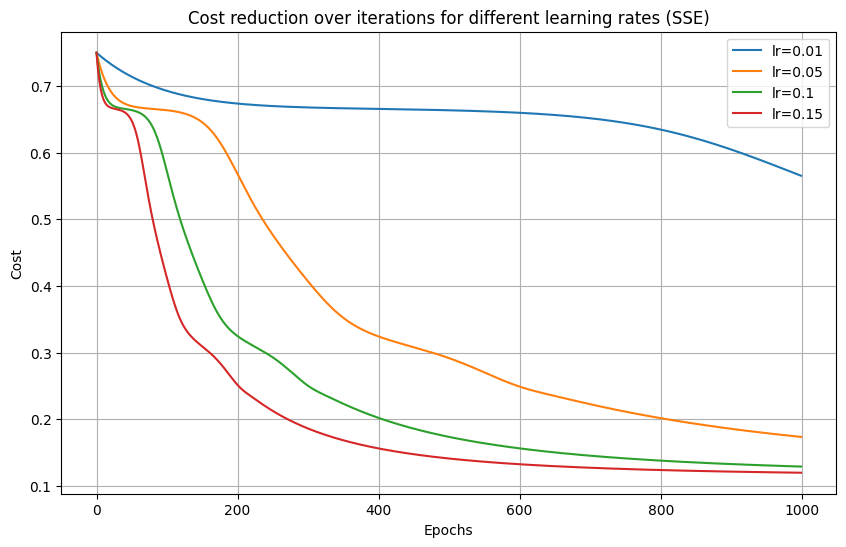

In [17]:
# Build a model with a n_h-dimensional hidden layer
n_h = 5
learning_rates = [0.01, 0.05, 0.1, 0.15]
lf = "SSE"
models = {}
costs = {}

for lr in learning_rates:
    #print(f"\nLearning rate: {lr}")
    parameters, cost = nn_model(X, Y, n_h, learning_rate=lr,loss_function="SSE", activation="sigmoid", num_iterations = 1000, print_cost=False)
    models[lr] = parameters
    costs[lr] = cost

# Plotting the cost for different learning rates
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(costs[lr], label=f'lr={lr}')

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Cost reduction over iterations for different learning rates (SSE)')
plt.legend()
plt.grid()
plt.show()

Using the cross-entropy loss function

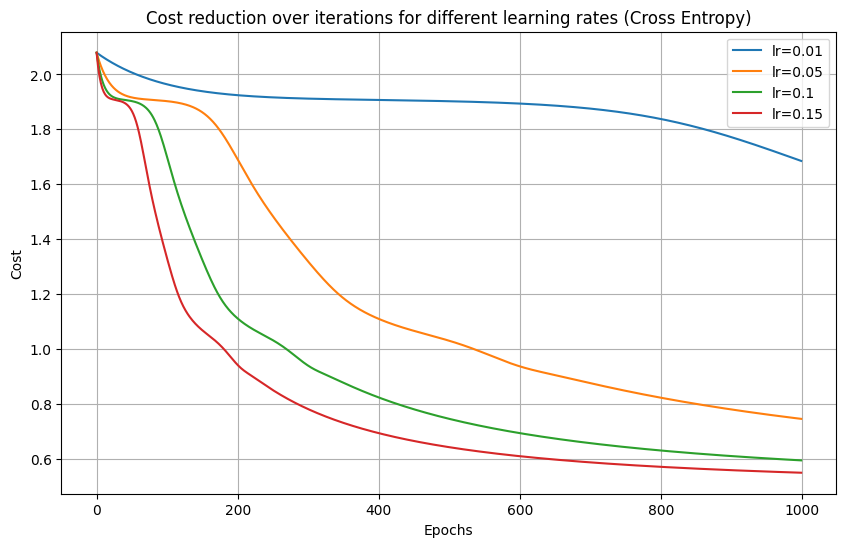

In [18]:
# Build a model with a n_h-dimensional hidden layer
n_h = 5
learning_rates = [0.01, 0.05, 0.1, 0.15]
lf = "CE"
models = {}
costs = {}

for lr in learning_rates:
    #print(f"\nLearning rate: {lr}")
    parameters, cost = nn_model(X, Y, n_h, learning_rate=lr,loss_function="CE", activation="sigmoid", num_iterations = 1000, print_cost=False)
    models[lr] = parameters
    costs[lr] = cost

# Plotting the cost for different learning rates
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(costs[lr], label=f'lr={lr}')

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Cost reduction over iterations for different learning rates (Cross Entropy)')
plt.legend()
plt.grid()
plt.show()

ReLU

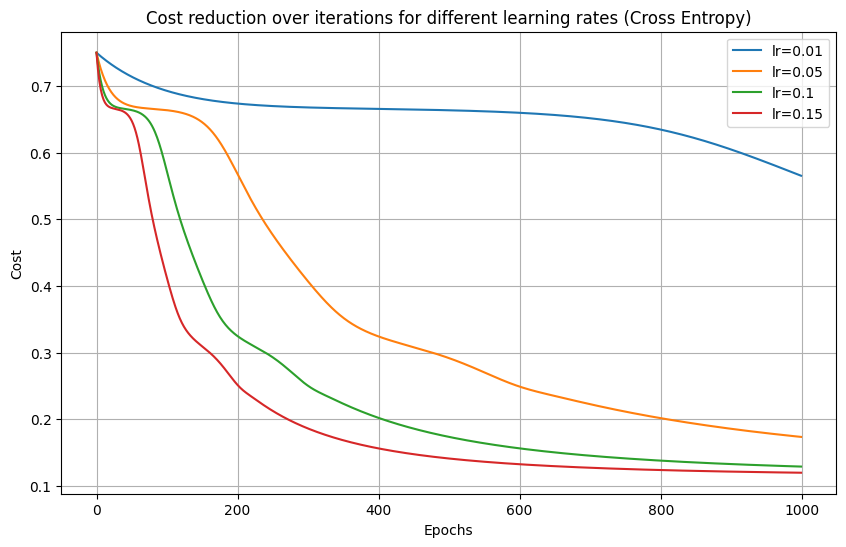

In [19]:
# Build a model with a n_h-dimensional hidden layer
n_h = 5
learning_rates = [0.01, 0.05, 0.1, 0.15]
lf = "SSE"
models = {}
costs = {}

for lr in learning_rates:
    #print(f"\nLearning rate: {lr}")
    parameters, cost = nn_model(X, Y, n_h, learning_rate=lr,loss_function="SSE", activation="relu", num_iterations = 1000, print_cost=False)
    models[lr] = parameters
    costs[lr] = cost

# Plotting the cost for different learning rates
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(costs[lr], label=f'lr={lr}')

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Cost reduction over iterations for different learning rates (Cross Entropy)')
plt.legend()
plt.grid()
plt.show()

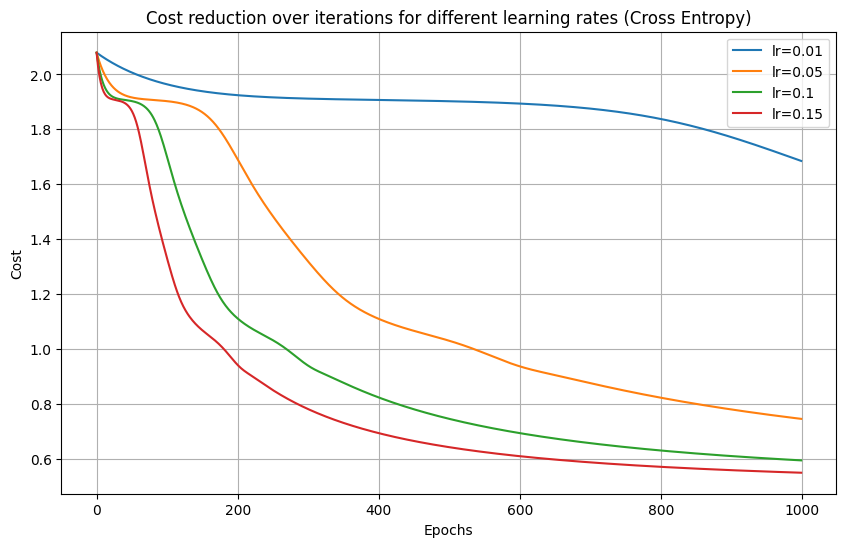

In [20]:
# Build a model with a n_h-dimensional hidden layer
n_h = 5
learning_rates = [0.01, 0.05, 0.1, 0.15]
lf = "CE"
models = {}
costs = {}

for lr in learning_rates:
    #print(f"\nLearning rate: {lr}")
    parameters, cost = nn_model(X, Y, n_h, learning_rate=lr,loss_function="CE", activation="relu", num_iterations = 1000, print_cost=False)
    models[lr] = parameters
    costs[lr] = cost

# Plotting the cost for different learning rates
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(costs[lr], label=f'lr={lr}')

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Cost reduction over iterations for different learning rates (Cross Entropy)')
plt.legend()
plt.grid()
plt.show()

Tanh

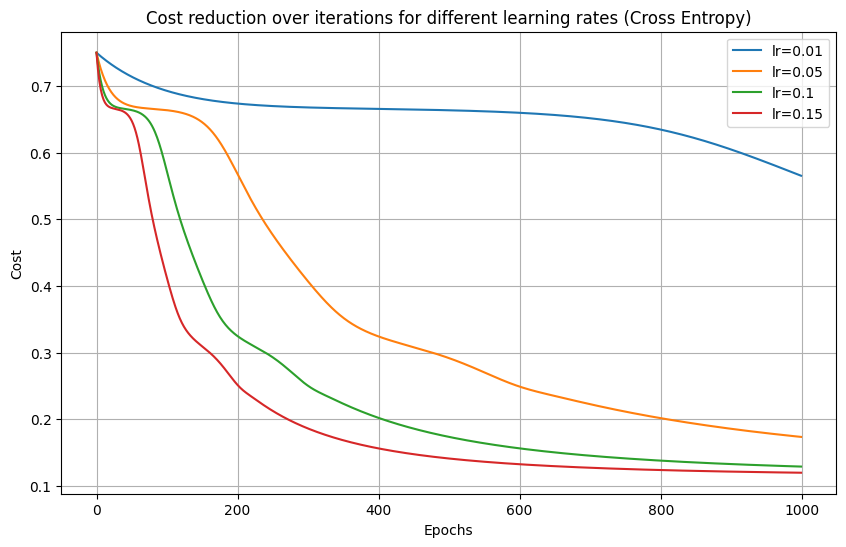

In [21]:
# Build a model with a n_h-dimensional hidden layer
n_h = 5
learning_rates = [0.01, 0.05, 0.1, 0.15]
models = {}
costs = {}

for lr in learning_rates:
    #print(f"\nLearning rate: {lr}")
    parameters, cost = nn_model(X, Y, n_h, learning_rate=lr,loss_function="SSE", activation="tanh", num_iterations = 1000, print_cost=False)
    models[lr] = parameters
    costs[lr] = cost

# Plotting the cost for different learning rates
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(costs[lr], label=f'lr={lr}')

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Cost reduction over iterations for different learning rates (Cross Entropy)')
plt.legend()
plt.grid()
plt.show()

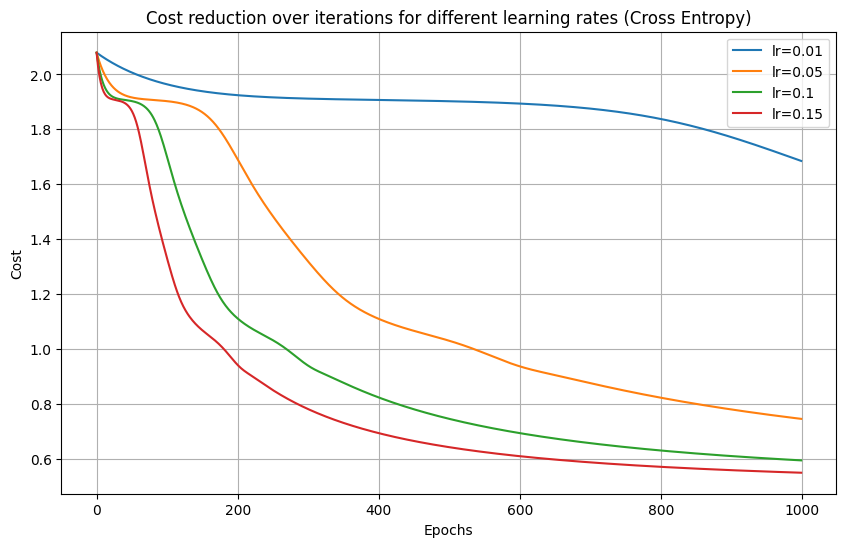

In [22]:
# Build a model with a n_h-dimensional hidden layer
n_h = 5
learning_rates = [0.01, 0.05, 0.1, 0.15]
models = {}
costs = {}

for lr in learning_rates:
    #print(f"\nLearning rate: {lr}")
    parameters, cost = nn_model(X, Y, n_h, learning_rate=lr,loss_function="CE", activation="tanh", num_iterations = 1000, print_cost=False)
    models[lr] = parameters
    costs[lr] = cost

# Plotting the cost for different learning rates
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(costs[lr], label=f'lr={lr}')

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Cost reduction over iterations for different learning rates (Cross Entropy)')
plt.legend()
plt.grid()
plt.show()

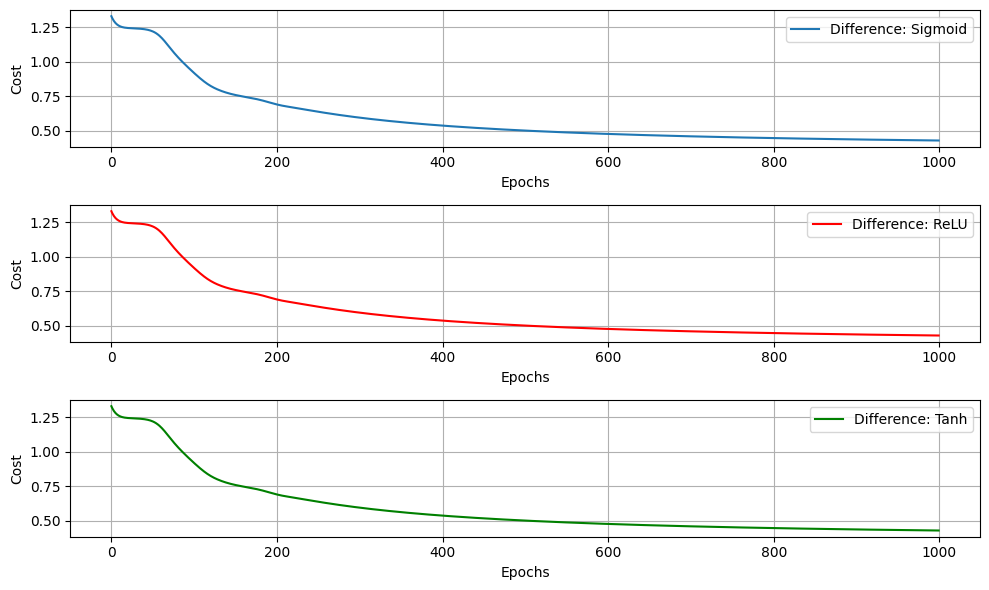

In [23]:

# Train the model with SSE loss
n_h = 5
lr = 0.15
num_iterations = 1000
parameters_sse, cost_sse = nn_model(X, Y, n_h, learning_rate=lr,loss_function="SSE", activation="sigmoid", num_iterations = 1000, print_cost=False)
parameters_sse_relu, cost_sse_relu = nn_model(X, Y, n_h, learning_rate=lr,loss_function="SSE", activation="relu", num_iterations = 1000, print_cost=False)
parameters_sse_tanh, cost_sse_tanh = nn_model(X, Y, n_h, learning_rate=lr,loss_function="SSE", activation="tanh", num_iterations = 1000, print_cost=False)

# Train the model with CE loss
parameters_ce, cost_ce = nn_model(X, Y, n_h, learning_rate=lr,loss_function="CE", activation="sigmoid", num_iterations = 1000, print_cost=False)
parameters_ce_relu, cost_ce_relu = nn_model(X, Y, n_h, learning_rate=lr,loss_function="CE", activation="relu", num_iterations = 1000, print_cost=False)
parameters_ce_tanh, cost_ce_tanh = nn_model(X, Y, n_h, learning_rate=lr,loss_function="CE", activation="tanh", num_iterations = 1000, print_cost=False)
fig, axs = plt.subplots(3, 1, figsize=(10, 6))  # Create 3 subplots in a single figure

# First plot: Sigmoid
axs[0].plot(np.abs(np.array(cost_sse) - np.array(cost_ce)), label='Difference: Sigmoid')
axs[0].set_ylabel('Cost')
axs[0].set_xlabel('Epochs')
axs[0].legend()
axs[0].grid()

# Second plot: ReLU
axs[1].plot(np.abs(np.array(cost_sse_relu) - np.array(cost_ce_relu)), label='Difference: ReLU', color="r")
axs[1].set_ylabel('Cost')
axs[1].set_xlabel('Epochs')
axs[1].legend()
axs[1].grid()

# Third plot: Tanh
axs[2].plot(np.abs(np.array(cost_sse_tanh) - np.array(cost_ce_tanh)), label='Difference: Tanh', color="g")
axs[2].set_ylabel('Cost')
axs[2].set_xlabel('Epochs')
axs[2].legend()
axs[2].grid()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


For each implementation of the neural network, a detailed analysis is conducted on both the loss functions and the activation functions utilized within the model. Additionally, varying learning rates are applied to assess their impact on the model's performance, allowing for a comprehensive evaluation of which configurations yield the most optimal results. Through this approach, the report aims to provide a thorough comparison of the performance metrics across different combinations of activation functions, loss functions, and learning rates.


1.1. **Two Layer Network**


1.1.1. **Loss Function and Activation Function**


The performance of SSE and CE loss functions was analyzed. The observations were as follows.

1. A learning rate of 0.15 seemed to fare better in both cases as the costs converged faster with respect to the other learning rates. It was also interesting to observe that it still was the most effective learning rate for both the ReLU and Tanh activation functions.

2. All three activation functions performed the same based on the different between their loss functions. Also, SSE is the best performing loss function for this use case.

# **L-Layer Deep Neural Network**





**Initialize the parameters of the L-Layer Neural Network**

In [24]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """

    np.random.seed(2)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(1 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))


    return parameters

In [25]:
layer_dims = [X.shape[0], 5, 20,10,5, Y.shape[0]]
parameters = initialize_parameters_deep(layer_dims)

for l in range(1, len(parameters) // 2 + 1):
    #print(f"Layer {l}:")
    print("Shape of W" + str(l) + ": " + str(parameters[f'W{l}'].shape))
    print("Shape of b" + str(l) + ": " + str(parameters[f'b{l}'].shape))
    #print(f"W{l}: {parameters[f'W{l}']}")

Shape of W1: (5, 30)
Shape of b1: (5, 1)
Shape of W2: (20, 5)
Shape of b2: (20, 1)
Shape of W3: (10, 20)
Shape of b3: (10, 1)
Shape of W4: (5, 10)
Shape of b4: (5, 1)
Shape of W5: (3, 5)
Shape of b5: (3, 1)


**Forward Propagation**

In [26]:
def forward_propagation_deep(X, parameters, activation="sigmoid"):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    """

    forward_cache = {}
    forward_cache["A0"] = X
    L = len(parameters) // 2 # number of layers in the neural network

    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        forward_cache["Z" + str(l)] = np.dot(parameters["W" + str(l)], forward_cache["A" + str(l-1)]) + parameters["b" + str(l)]

        if activation == "sigmoid":
            forward_cache["A" + str(l)] = sigmoid(forward_cache["Z" + str(l)])
        elif activation == "relu":
            forward_cache["A" + str(l)] = relu(forward_cache["Z" + str(l)])
        else:
            forward_cache["A" + str(l)] = tanh(forward_cache["Z" + str(l)])

    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    forward_cache["Z" + str(L)] = np.dot(parameters["W" + str(L)], forward_cache["A" + str(L-1)]) + parameters["b" + str(L)]
    forward_cache["A" + str(L)] = sigmoid(forward_cache["Z" + str(L)])


    return forward_cache["A" + str(L)], forward_cache

**Cost Function**

In [27]:
def compute_cost_deep(AL, Y, loss_function = "SSE"):
  """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector , shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """

  m = Y.shape[1]
  if loss_function == "SSE":
    cost = np.sum((AL - Y)**2) * 1/m

  elif loss_function == "CE":
    cost = -1/m * np.sum(np.multiply(Y, np.log(AL)) + np.multiply((1-Y), np.log((1-AL))))

  cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect

  return cost


**Activation functions derivatives**

In [28]:
def derivative_relu(x):
  return np.where(x > 0, 1, 0)

def derivative_sigmoid(x):
  return np.multiply(x, 1 - x)

def derivative_tanh(x):
  return 1 - np.power(x, 2)

**BackPropagation**

In [29]:
def backward_propagation_deep(AL, Y, parameters, forward_cache, activation="sigmoid"):
  """
    Implement the backpropagation.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector
    parameters -- python dictionary containing your parameters
    forward_cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"


    Returns:
    cost -- cross-entropy cost
    """
  grads = {}
  L = len(parameters) // 2  # Number of layers in the neural network
  m = Y.shape[1]

  grads["dA" + str(L)] = AL - Y
  grads["dW" + str(L)] = 1/m * np.dot(grads["dA" + str(L)], forward_cache["A" + str(L-1)].T)
  grads["db" + str(L)] = 1/m * np.sum(grads["dA" + str(L)], axis=1, keepdims=True)

  for l in reversed(range(1, L)):
    if activation == "relu":
       grads["dZ" + str(l)] = np.dot(parameters["W" + str(l+1)].T, grads["dA" + str(l+1)]) * derivative_relu(forward_cache["A" + str(l)])

    elif activation == "sigmoid":
       grads["dZ" + str(l)] = np.dot(parameters["W" + str(l+1)].T, grads["dA" + str(l+1)]) * derivative_sigmoid(forward_cache["A" + str(l)])


    else:
       grads["dZ" + str(l)] = np.dot(parameters["W" + str(l+1)].T, grads["dA" + str(l+1)]) * derivative_tanh(forward_cache["A" + str(l)])

    grads["dW" + str(l)] = 1/m * np.dot(grads["dZ" + str(l)], forward_cache["A" + str(l-1)].T)
    grads["db" + str(l)] = 1/m * np.sum(grads["dZ" + str(l)], axis=1, keepdims=True)

  return grads

**Update Parameters**

In [30]:
def update_parameters(parameters, grads, learning_rate):
  """
    Update parameters using the gradient descent

    Argument:
    parameters -- python dictionary containing parameters
    grads -- python dictionary containing gradients

    Return:
    parameters -- python dictionary containing updated parameters
    """

  L = len(parameters) // 2

  for l in range(1, L+1):
      parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads["dW" + str(l)]
      parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads["db" + str(l)]

  return parameters


**Model Function**

In [31]:
def nn_model(X, Y, layer_dims, learning_rate, loss_function="SSE", activation="sigmoid", num_iterations=1000, print_cost=False):
    """
    Neural network model that handles multiple activation functions and loss functions.

    Arguments:
    X -- input data
    Y -- labels
    layer_dims -- list containing the dimensions of each layer in the network
    learning_rate -- learning rate for gradient descent
    loss_function -- loss function to use ("SSE" or "CE")
    activation -- activation function to use ("sigmoid", "relu", "tanh")
    num_iterations -- number of iterations to run the training loop
    print_cost -- if True, print the cost every 100 iterations

    Returns:
    parameters -- learned parameters
    costs -- list of costs over the iterations
    """

    # Initialize parameters
    parameters = initialize_parameters_deep(layer_dims)
    costs = []

    # Function map for different activations and losses
    activations_map = {
        "sigmoid": forward_propagation_deep,
        "relu": forward_propagation_deep,
        "tanh": forward_propagation_deep
    }

    loss_map = {
        "SSE": compute_cost_deep,
        "CE": compute_cost_deep
    }

    # Select the appropriate forward propagation and loss function
    forward_propagation_fn = activations_map.get(activation)
    loss_fn = loss_map.get(loss_function)

    if forward_propagation_fn is None or loss_fn is None:
        raise ValueError("Invalid activation or loss function")

    # Gradient descent loop
    for i in range(num_iterations):
        # Forward propagation
        AL, forward_cache = forward_propagation_fn(X, parameters, activation)

        # Compute cost
        cost = loss_fn(AL, Y, loss_function)

        # Backward propagation
        grads = backward_propagation_deep(AL, Y, parameters, forward_cache, activation)

        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)

        # Save the cost and optionally print it
        costs.append(cost)
        if print_cost and i % 100 == 0:
            print(f"Cost after iteration {i}: {cost:.6f}")

    return parameters, costs

**Loss Function** = SSE;
**Activation Function** = Sigmoid

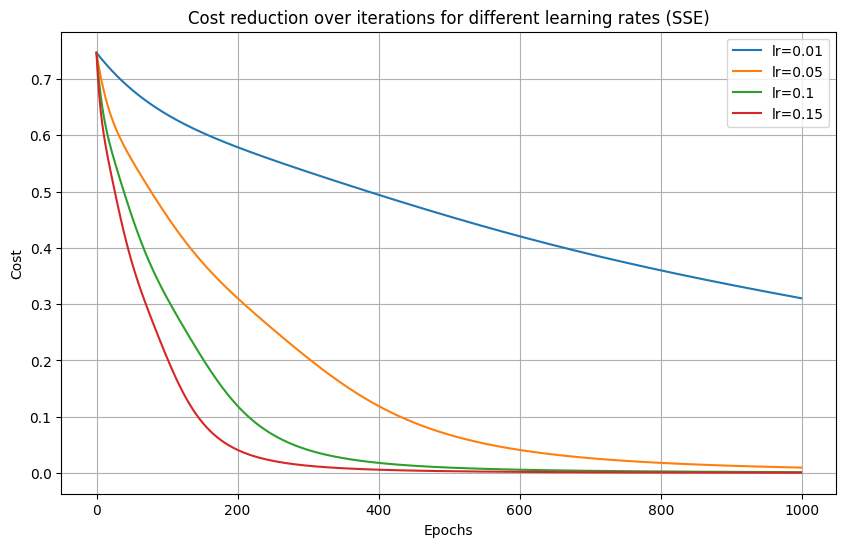

In [32]:
layer_dims = [X.shape[0], n_h,  Y.shape[0]]
learning_rates = [0.01, 0.05, 0.1, 0.15]
costs_for_lr = {}  # Store costs for each learning rate
iters = 1000

for lr in learning_rates:
    #print(f"\nLearning rate: {lr}")
    parameters, cost = nn_model(X, Y, layer_dims, lr, loss_function="SSE", activation = "sigmoid", num_iterations = iters)
    costs_for_lr[lr] = cost

# Plotting the cost for different learning rates
plt.figure(figsize=(10, 6))
for lr, costs in costs_for_lr.items():
    plt.plot(costs, label=f'lr={lr}')

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Cost reduction over iterations for different learning rates (SSE)')
plt.legend()
plt.grid()
plt.show()


**Loss Function** = CE;
**Activation Function** = Sigmoid

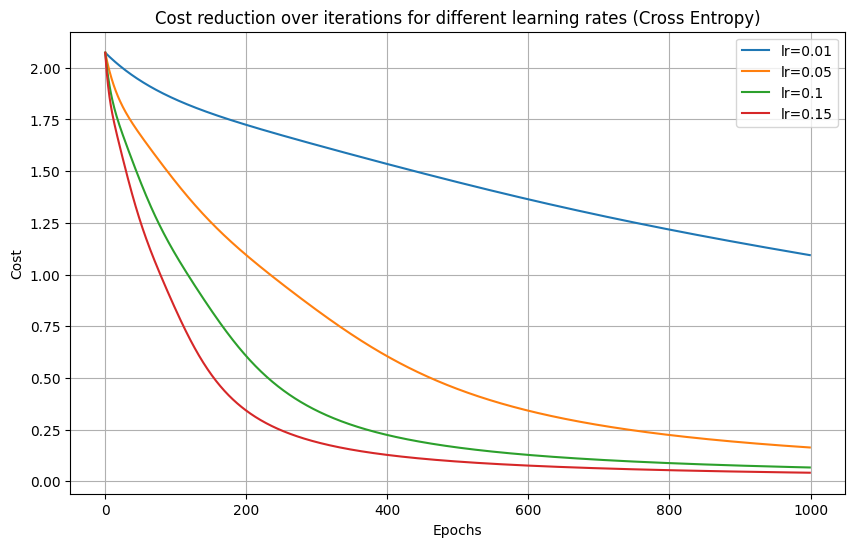

In [33]:
layer_dims = [X.shape[0], n_h,  Y.shape[0]]
learning_rates = [0.01, 0.05, 0.1, 0.15]
costs_for_lr = {}  # Store costs for each learning rate
iters = 1000

for lr in learning_rates:
    #print(f"\nLearning rate: {lr}")
    parameters, cost = nn_model(X, Y, layer_dims, lr, loss_function="CE", activation = "sigmoid", num_iterations = iters)
    costs_for_lr[lr] = cost

# Plotting the cost for different learning rates
plt.figure(figsize=(10, 6))
for lr, costs in costs_for_lr.items():
    plt.plot(costs, label=f'lr={lr}')

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Cost reduction over iterations for different learning rates (Cross Entropy)')
plt.legend()
plt.grid()
plt.show()


**Loss Function**: SSE; **Activation Function**: Tanh

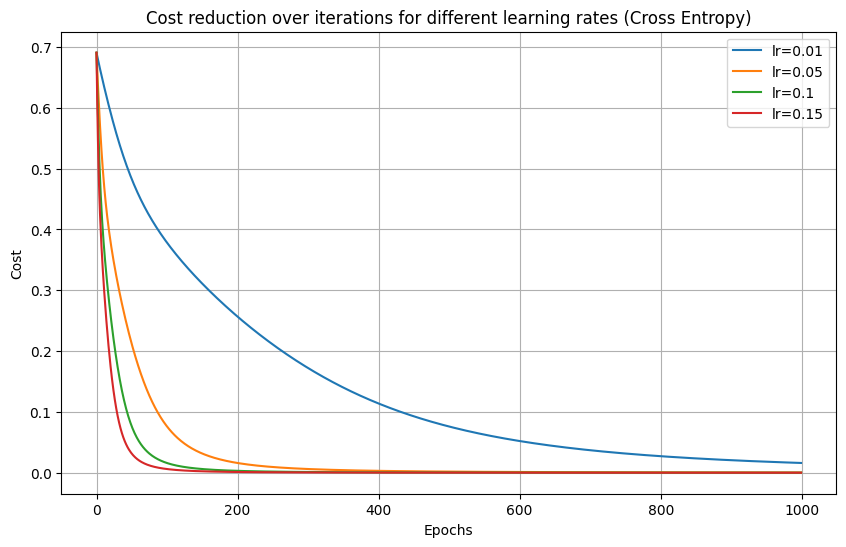

In [34]:
layer_dims = [X.shape[0], n_h,  Y.shape[0]]
learning_rates = [0.01, 0.05, 0.1, 0.15]
costs_for_lr = {}  # Store costs for each learning rate
iters = 1000

for lr in learning_rates:
    #print(f"\nLearning rate: {lr}")
    parameters, cost = nn_model(X, Y, layer_dims, lr, loss_function="SSE", activation = "tanh", num_iterations = iters)
    costs_for_lr[lr] = cost

# Plotting the cost for different learning rates
plt.figure(figsize=(10, 6))
for lr, costs in costs_for_lr.items():
    plt.plot(costs, label=f'lr={lr}')

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Cost reduction over iterations for different learning rates (Cross Entropy)')
plt.legend()
plt.grid()
plt.show()

**Loss Function**: CE; **Activation Function**: Tanh

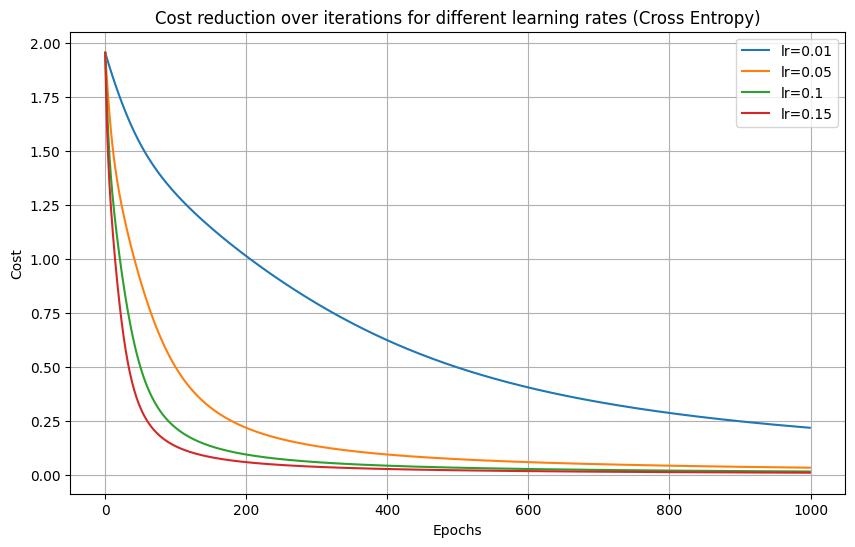

In [35]:
layer_dims = [X.shape[0], n_h,  Y.shape[0]]
learning_rates = [0.01, 0.05, 0.1, 0.15]
costs_for_lr = {}  # Store costs for each learning rate
iters = 1000

for lr in learning_rates:
    #print(f"\nLearning rate: {lr}")
    parameters, cost = nn_model(X, Y, layer_dims, lr, loss_function="CE", activation = "tanh", num_iterations = iters)
    costs_for_lr[lr] = cost

# Plotting the cost for different learning rates
plt.figure(figsize=(10, 6))
for lr, costs in costs_for_lr.items():
    plt.plot(costs, label=f'lr={lr}')

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Cost reduction over iterations for different learning rates (Cross Entropy)')
plt.legend()
plt.grid()
plt.show()

**Loss Function**: SSE; **Activation Function**: ReLU

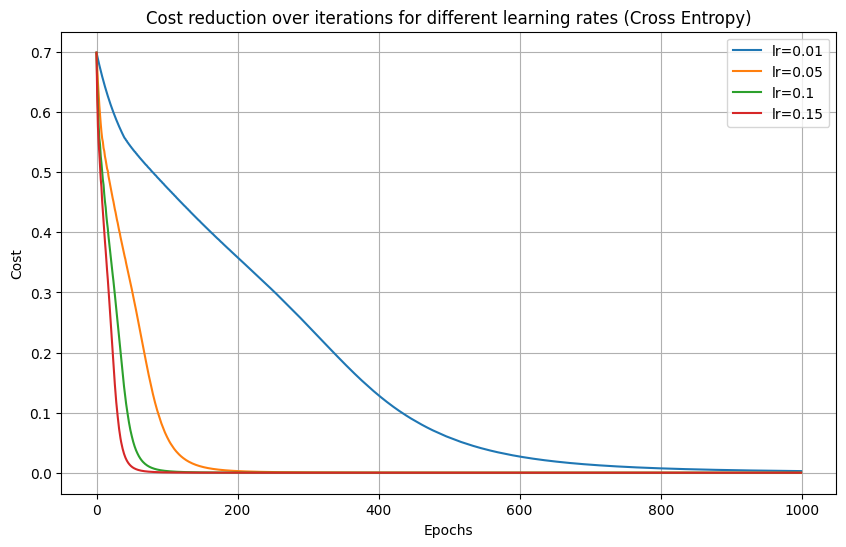

In [36]:
layer_dims = [X.shape[0], n_h,  Y.shape[0]]
learning_rates = [0.01, 0.05, 0.1, 0.15]
costs_for_lr = {}  # Store costs for each learning rate
iters = 1000

for lr in learning_rates:
    #print(f"\nLearning rate: {lr}")
    parameters, cost = nn_model(X, Y, layer_dims, lr, loss_function="SSE", activation = "relu", num_iterations = iters)
    costs_for_lr[lr] = cost

# Plotting the cost for different learning rates
plt.figure(figsize=(10, 6))
for lr, costs in costs_for_lr.items():
    plt.plot(costs, label=f'lr={lr}')

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Cost reduction over iterations for different learning rates (Cross Entropy)')
plt.legend()
plt.grid()
plt.show()

**Loss Function** = CE; **Activation Function** = ReLU

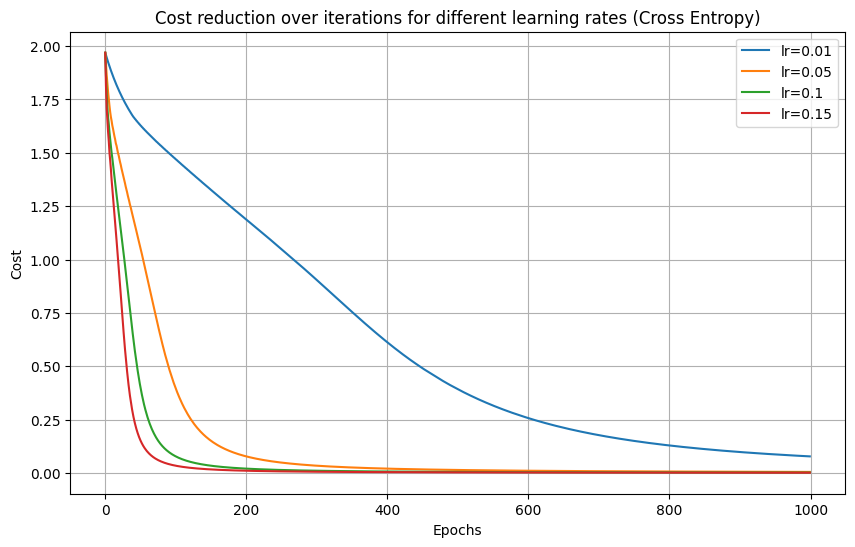

In [37]:
layer_dims = [X.shape[0], n_h,  Y.shape[0]]
learning_rates = [0.01, 0.05, 0.1, 0.15]
costs_for_lr = {}  # Store costs for each learning rate
iters = 1000

for lr in learning_rates:
    #print(f"\nLearning rate: {lr}")
    parameters, cost = nn_model(X, Y, layer_dims, lr, loss_function="CE", activation = "relu", num_iterations = iters)
    costs_for_lr[lr] = cost

# Plotting the cost for different learning rates
plt.figure(figsize=(10, 6))
for lr, costs in costs_for_lr.items():
    plt.plot(costs, label=f'lr={lr}')

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Cost reduction over iterations for different learning rates (Cross Entropy)')
plt.legend()
plt.grid()
plt.show()

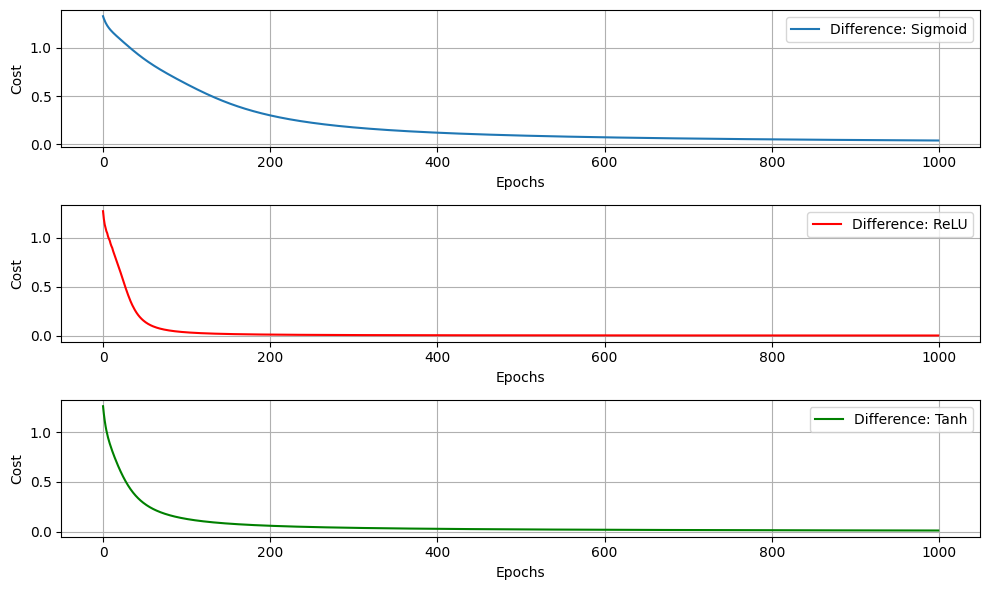

In [38]:
# Train the model with SSE loss
learning_rate = 0.15
num_iterations = 1000
parameters_sse, cost_sse = nn_model(X, Y, layer_dims, learning_rate=lr,loss_function="SSE", activation="sigmoid", num_iterations = 1000)
parameters_sse_relu, cost_sse_relu = nn_model(X, Y, layer_dims, learning_rate=lr,loss_function="SSE", activation="relu", num_iterations = 1000)
parameters_sse_tanh, cost_sse_tanh = nn_model(X, Y, layer_dims, learning_rate=lr,loss_function="SSE", activation="tanh", num_iterations = 1000)

# Train the model with CE loss
parameters_ce, cost_ce = nn_model(X, Y, layer_dims, learning_rate=lr,loss_function="CE", activation="sigmoid", num_iterations = 1000)
parameters_ce_relu, cost_ce_relu = nn_model(X, Y, layer_dims, learning_rate=lr,loss_function="CE", activation="relu", num_iterations = 1000)
parameters_ce_tanh, cost_ce_tanh = nn_model(X, Y, layer_dims, learning_rate=lr,loss_function="CE", activation="tanh", num_iterations = 1000)
fig, axs = plt.subplots(3, 1, figsize=(10, 6))  # Create 3 subplots in a single figure

# First plot: Sigmoid
axs[0].plot(np.abs(np.array(cost_sse) - np.array(cost_ce)), label='Difference: Sigmoid')
axs[0].set_ylabel('Cost')
axs[0].set_xlabel('Epochs')
axs[0].legend()
axs[0].grid()

# Second plot: ReLU
axs[1].plot(np.abs(np.array(cost_sse_relu) - np.array(cost_ce_relu)), label='Difference: ReLU', color="r")
axs[1].set_ylabel('Cost')
axs[1].set_xlabel('Epochs')
axs[1].legend()
axs[1].grid()

# Third plot: Tanh
axs[2].plot(np.abs(np.array(cost_sse_tanh) - np.array(cost_ce_tanh)), label='Difference: Tanh', color="g")
axs[2].set_ylabel('Cost')
axs[2].set_xlabel('Epochs')
axs[2].legend()
axs[2].grid()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**1.2. L-Layer Network**

For this layer network, the number of layers is flexible and no longer restricted to just two layers. Here are some of the findings.
As always, the relationship between the loss and activation functions was being analyzed.

1. A learning rate of 0.15 seemed to still fare better in both cases as shown for a two-layer network. For example, the graph showing the cost function using both SSE and sigmoid, the learning rates do not experience any form of illustration as shown in a two-layer network.

2. The absolute difference between the SSE and CE for the L-Layer Network also appeared to be smoother that the Two-Layer Network. It converged more quickly as depicted in fig.5. It can be inferred for ReLU that it converges quickly compared to the rest.

**Using Keras Implementation**

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

Using SSE as the loss function

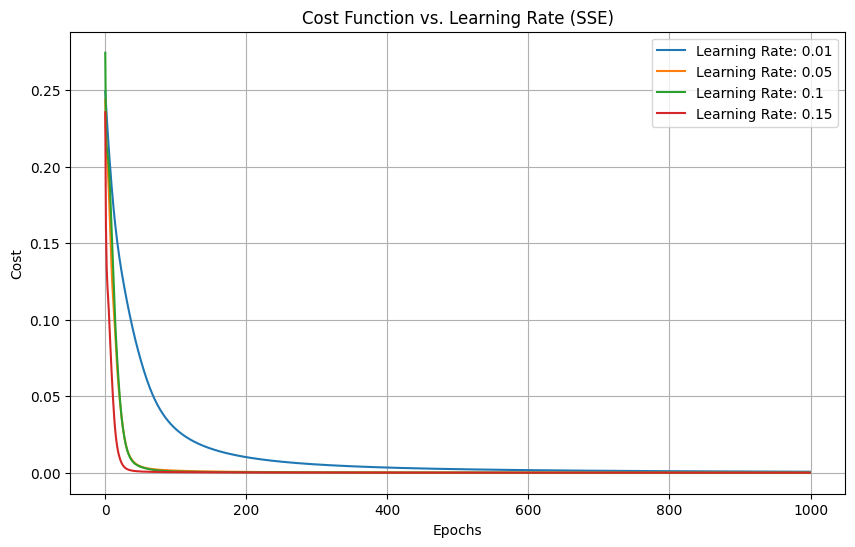

In [40]:
learning_rates = [0.01, 0.05, 0.1, 0.15]
costs_sse = []

for lr in learning_rates:
  model = Sequential([
      Input(shape=(30,)),Flatten(),
      Dense(units=5, activation='sigmoid'),
      Dense(units=3, activation='sigmoid'),
  ])
  model.compile(optimizer=Adam(learning_rate=lr), loss='mse', metrics=['accuracy'])
  history = model.fit(x=X.T, y=Y, batch_size=10, epochs=1000, shuffle=False, verbose=0)
  costs_sse.append(history.history['loss'])

plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
  plt.plot(costs_sse[i], label=f'Learning Rate: {lr}')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function vs. Learning Rate (SSE)')
plt.legend()
plt.grid(True)
plt.show()

Using cross entropy as the loss function

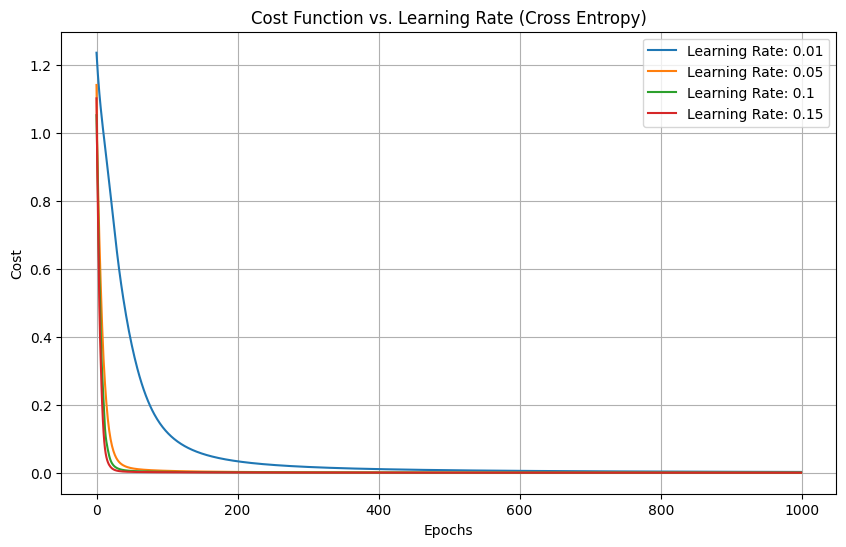

In [41]:
learning_rates = [0.01, 0.05, 0.1, 0.15]
costs_ce = []

for lr in learning_rates:
  model = Sequential([
      Input(shape=(30,)),Flatten(),
      Dense(units=5, activation='sigmoid'),
      Dense(units=3, activation='sigmoid'),
  ])
  model.compile(optimizer=Adam(learning_rate=lr), loss= "categorical_crossentropy", metrics=['accuracy'])
  history = model.fit(x=X.T, y=Y, batch_size=10, epochs=1000, shuffle=False, verbose=0)
  costs_ce.append(history.history['loss'])

plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
  plt.plot(costs_ce[i], label=f'Learning Rate: {lr}')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function vs. Learning Rate (Cross Entropy)')
plt.legend()
plt.grid(True)
plt.show()

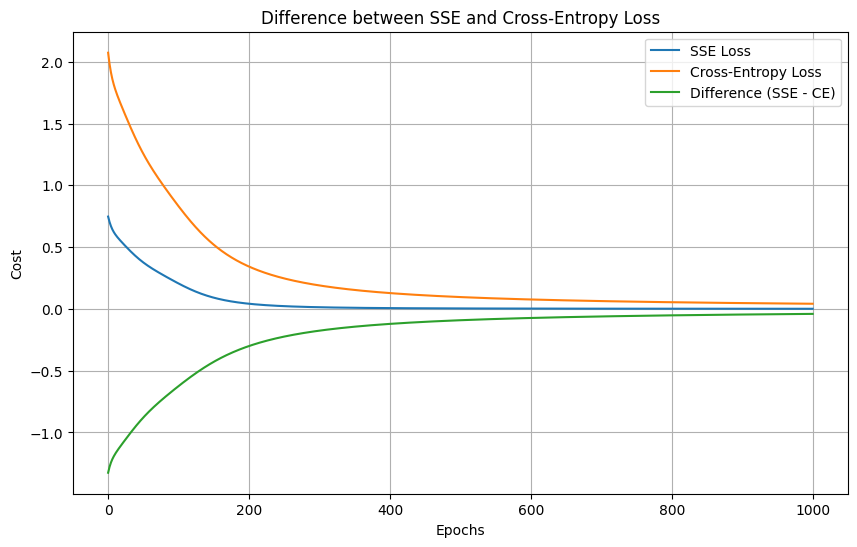

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(cost_sse, label='SSE Loss')
plt.plot(cost_ce, label='Cross-Entropy Loss')
plt.plot(np.array(cost_sse) - np.array(cost_ce), label='Difference (SSE - CE)')  # Plot the difference

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Difference between SSE and Cross-Entropy Loss')
plt.legend()
plt.grid()
plt.show()


**Testing using different activation functions**

ReLU for the hiddern layer

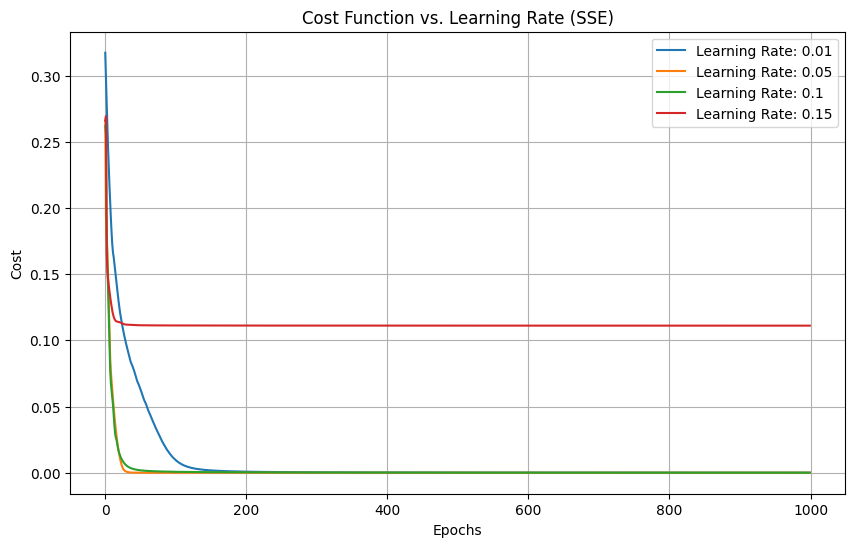

In [43]:
learning_rates = [0.01, 0.05, 0.1, 0.15]
costs_ce = []

for lr in learning_rates:
  model = Sequential([
      Input(shape=(30,)),Flatten(),
      Dense(units=5, activation='relu'),
      Dense(units=3, activation='sigmoid'),
  ])
  model.compile(optimizer=Adam(learning_rate=lr), loss= "mse", metrics=['accuracy'])
  history = model.fit(x=X.T, y=Y, batch_size=10, epochs=1000, shuffle=False, verbose=0)
  costs_ce.append(history.history['loss'])

plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
  plt.plot(costs_ce[i], label=f'Learning Rate: {lr}')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function vs. Learning Rate (SSE)')
plt.legend()
plt.grid(True)
plt.show()

ReLU for the hidden layer

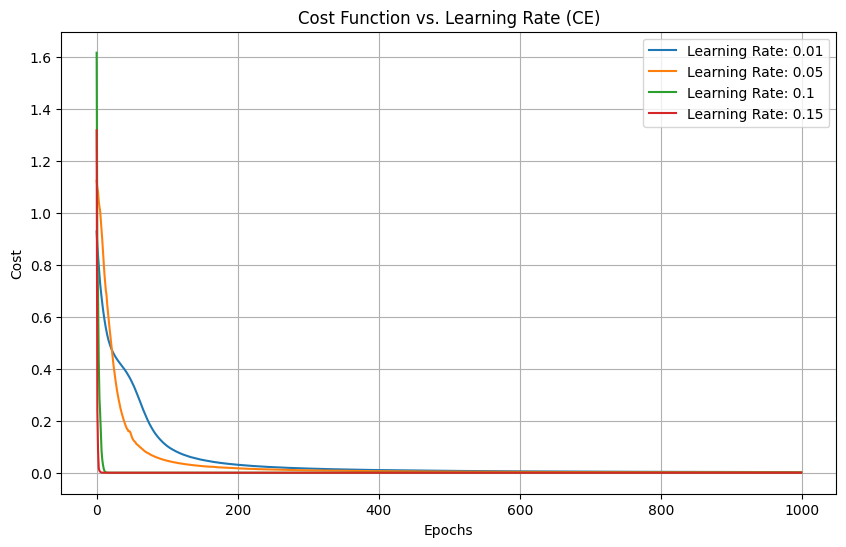

In [44]:
learning_rates = [0.01, 0.05, 0.1, 0.15]
costs_sse = []

for lr in learning_rates:
  model = Sequential([
      Input(shape=(30,)),Flatten(),
      Dense(units=5, activation='relu'),
      Dense(units=3, activation='sigmoid'),
  ])
  model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(x=X.T, y=Y, batch_size=10, epochs=1000, shuffle=False, verbose=0)
  costs_sse.append(history.history['loss'])

plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
  plt.plot(costs_sse[i], label=f'Learning Rate: {lr}')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function vs. Learning Rate (CE)')
plt.legend()
plt.grid(True)
plt.show()

Tanh for the hidden layer

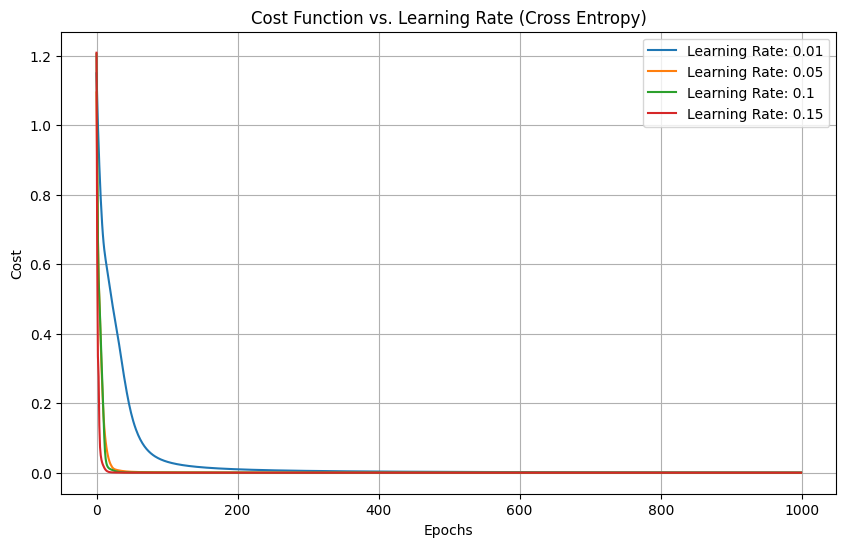

In [45]:
learning_rates = [0.01, 0.05, 0.1, 0.15]
costs_ce = []

for lr in learning_rates:
  model = Sequential([
      Input(shape=(30,)),Flatten(),
      Dense(units=5, activation='tanh'),
      Dense(units=3, activation='sigmoid'),
  ])
  model.compile(optimizer=Adam(learning_rate=lr), loss= "categorical_crossentropy", metrics=['accuracy'])
  history = model.fit(x=X.T, y=Y, batch_size=10, epochs=1000, shuffle=False, verbose=0)
  costs_ce.append(history.history['loss'])

plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
  plt.plot(costs_ce[i], label=f'Learning Rate: {lr}')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function vs. Learning Rate (Cross Entropy)')
plt.legend()
plt.grid(True)
plt.show()

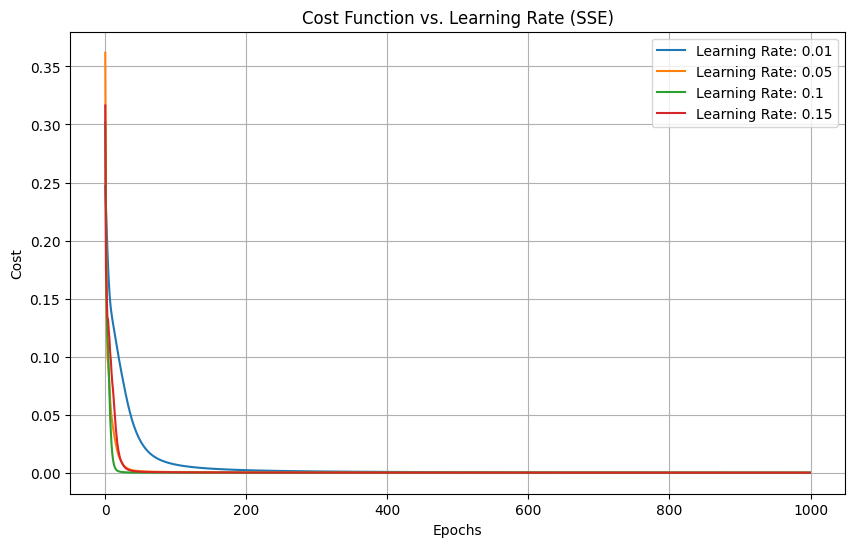

In [46]:
learning_rates = [0.01, 0.05, 0.1, 0.15]
costs_ce = []

for lr in learning_rates:
  model = Sequential([
      Input(shape=(30,)),Flatten(),
      Dense(units=5, activation='tanh'),
      Dense(units=3, activation='sigmoid'),
  ])
  model.compile(optimizer=Adam(learning_rate=lr), loss= "mse", metrics=['accuracy'])
  history = model.fit(x=X.T, y=Y, batch_size=10, epochs=1000, shuffle=False, verbose=0)
  costs_ce.append(history.history['loss'])

plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
  plt.plot(costs_ce[i], label=f'Learning Rate: {lr}')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function vs. Learning Rate (SSE)')
plt.legend()
plt.grid(True)
plt.show()

**1.3 Keras Implementation**

In the early implementations of the model, a sigmoid function was applied as the activation function in the hidden layers. However, for the experiments conducted in this section, both the tanh and ReLU activation functions were employed. The objective was to compare and evaluate the performance of these two activation functions under similar conditions. The analysis of their performance, behavior, and overall impact on the model's output is detailed as follows:

**1.3.1 Using SSE as loss function:**

1. The curve appeared smoother than an L-Layer Network.

2. Unlike the previous layer structures, the most effective learning rates were 0.1, 0.15 and 0.05 when using the sigmoid activation function.

3. For the ReLU activation function, a different trend is noticed. A learning rate of 0.05 appears to be the most effective.

4. A learning rate of 0.15 appeared to be the most effective and the curve is also smoother than that of the L-layer and two-layer network.